### Если юзер Android нажимает “отменить”, предлагать промокод в случае НЕ отмены
### Ожидаем: ниже отмены на Android устройствах

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('post_abtest_data.csv')
data[['date','user_id','user_cancelled','groups','os']].head()

,date,user_id,user_cancelled,groups,os
0,2020-05-28,867689,0.0,Control,Android
1,2020-05-29,867689,NaN,Control,iOS
2,2020-05-25,867689,0.0,Control,Android
3,2020-05-29,752172,0.0,Control,Android
4,2020-05-28,752172,0.0,Control,iOS


In [49]:
 # только Android
os = data[data['os'] == 'Android']
os = os[['date','user_id','user_cancelled','groups']]

In [50]:
os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60825 entries, 0 to 101499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            60825 non-null  object 
 1   user_id         60825 non-null  int64  
 2   user_cancelled  42177 non-null  float64
 3   groups          60825 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [51]:
# удаляю строки со значением Nan
os.dropna(inplace=True)
os

,date,user_id,user_cancelled,groups
0,2020-05-28,867689,0.0,Control
2,2020-05-25,867689,0.0,Control
3,2020-05-29,752172,0.0,Control
7,2020-05-30,486559,0.0,Control
9,2020-05-29,486559,0.0,Control
...,...,...,...,...
101490,2020-05-25,600165,0.0,Control
101491,2020-05-29,556405,0.0,Control
101493,2020-05-26,442716,0.0,Test
101497,2020-05-26,352605,0.0,Test


In [180]:
# День №1 - 25 мая
day25 = os[os['date']=='2020-05-25'] # выбираю 25 число
group1 = day25[day25['groups']=='Control'].user_cancelled
group2 = day25[day25['groups']=='Test'].user_cancelled
group2.drop(group2.index[:178],inplace=True) # выравниваю группы, удаляю произвольные строки
p_value25 = stats.ttest_ind(group1,group2)[1] # ttest Student
print('p-value на "2020-05-25" =', p_value25)

p-value на "2020-05-25" = 0.02326737095709275


In [179]:
# День №2 - 26 мая
day26 = os[os['date']=='2020-05-26']
group3 = day26[day26['groups']=='Control'].user_cancelled
group4 = day26[day26['groups']=='Test'].user_cancelled
group4.drop(group4.index[:100],inplace=True)
p_value26 = stats.ttest_ind(group3,group4)[1]
print('p-value на "2020-05-26" =', p_value26)

p-value на "2020-05-26" = 8.019029387393315e-05


In [178]:
# День №3 - 27 мая
day27 = os[os['date']=='2020-05-27']
group5 = day27[day27['groups']=='Control'].user_cancelled
group6 = day27[day27['groups']=='Test'].user_cancelled
group6.drop(group6.index[:96],inplace=True)
p_value27 = stats.ttest_ind(group5,group6)[1]
print('p-value на "2020-05-27" =', p_value27)

p-value на "2020-05-27" = 1.0161716726824406e-07


In [183]:
# День №4 - 28 мая
day28 = os[os['date']=='2020-05-28']
group7 = day28[day28['groups']=='Control'].user_cancelled
group8 = day28[day28['groups']=='Test'].user_cancelled
group8.drop(group8.index[:53],inplace=True)
p_value28 = stats.ttest_ind(group7,group8)[1]
print('p-value на "2020-05-28" =', p_value28)

p-value на "2020-05-28" = 5.138261224267509e-06


D:\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [149]:
# День №5 - 29 мая
day29 = os[os['date']=='2020-05-29']
group9 = day29[day29['groups']=='Control'].user_cancelled
group10 = day29[day29['groups']=='Test'].user_cancelled
p_value29 = stats.ttest_ind(group9,group10)[1]
print('p-value на "2020-05-29" =', p_value29)

p-value на "2020-05-29" = 5.82322439316649e-07


In [140]:
# День №6 - 30 мая
day30 = os[os['date']=='2020-05-30']
group11 = day30[day30['groups']=='Control'].user_cancelled
group12 = day30[day30['groups']=='Test'].user_cancelled
group12.drop(group12.index[:22],inplace=True)
p_value30 = stats.ttest_ind(group11,group12)[1]
print('p-value на "2020-05-30" =', p_value30)

p-value на "2020-05-30" = 2.352602575239131e-06


In [177]:
# День №7 - 31 мая
day31 = os[os['date']=='2020-05-31']
group13 = day31[day31['groups']=='Control'].user_cancelled
group14 = day31[day31['groups']=='Test'].user_cancelled
group14.drop(group14.index[:44],inplace=True)
p_value31 = stats.ttest_ind(group13,group14)[1]
print('p-value на "2020-05-31" =', 'p_value31 %.3f'% p_value31)

p-value на "2020-05-31" = p_value31 0.000


In [184]:
# таблица со значением p-value в разные дни
df = pd.DataFrame({'date': ['2020-05-25','2020-05-26','2020-05-27','2020-05-28','2020-05-29','2020-05-30','2020-05-31'], 
                   'p_value': [p_value25,p_value26,p_value27,p_value28,p_value29,p_value30,p_value31]})
df

,date,p_value
0,2020-05-25,2.326737e-02
1,2020-05-26,8.019029e-05
2,2020-05-27,1.016172e-07
3,2020-05-28,5.138261e-06
4,2020-05-29,5.823224e-07
5,2020-05-30,2.352603e-06
6,2020-05-31,1.437475e-05


In [145]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

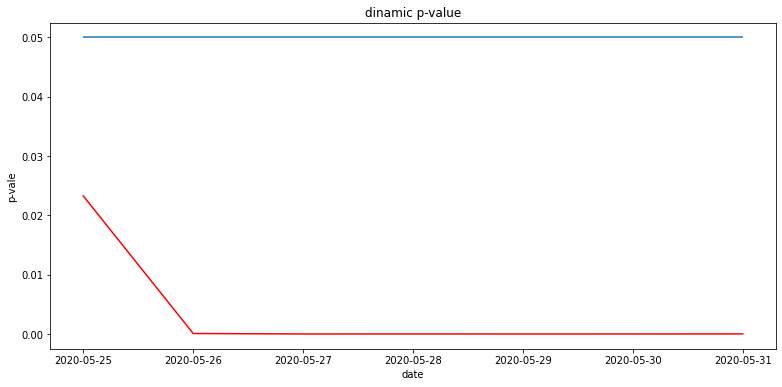

In [185]:
# визуализация
plt.plot(df.date, df.p_value,'r')
plt.title('dinamic p-value')
plt.xlabel('date')
plt.ylabel('p-vale')
plt.hlines(0.05,'2020-05-25','2020-05-31') # прямая линия, выбираю уровень значимости a=0.05

### Вывод: так как p-value < a, то наблюдаются значимые различия м/у группами